In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", palette="muted")
current_palette = sns.color_palette()
df = pd.read_csv("happiness_score_dataset.csv")
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


C:\Users\SREEDHAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

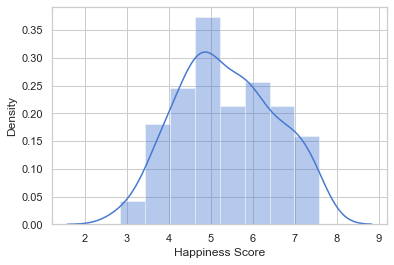

In [35]:
sns.distplot(df['Happiness Score'])

<AxesSubplot:>

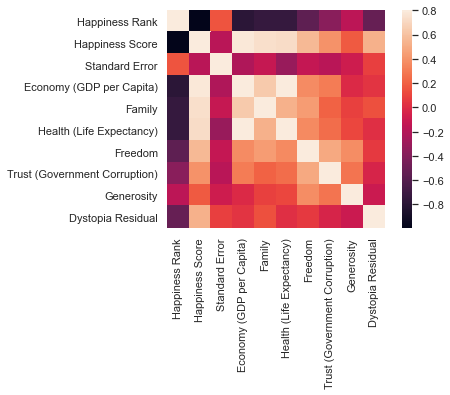

In [36]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Western Europe'),
  Text(1, 0, 'North America'),
  Text(2, 0, 'Australia and New Zealand'),
  Text(3, 0, 'Middle East and Northern Africa'),
  Text(4, 0, 'Latin America and Caribbean'),
  Text(5, 0, 'Southeastern Asia'),
  Text(6, 0, 'Central and Eastern Europe'),
  Text(7, 0, 'Eastern Asia'),
  Text(8, 0, 'Sub-Saharan Africa'),
  Text(9, 0, 'Southern Asia')])

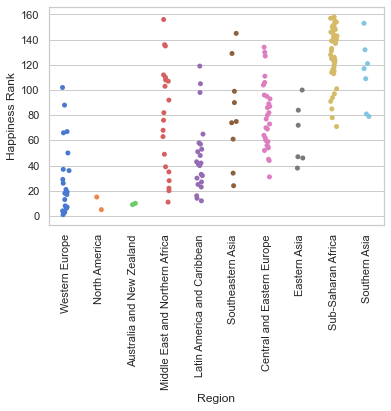

In [37]:
g = sns.stripplot(x="Region", y="Happiness Rank", data=df, jitter=True)
plt.xticks(rotation=90)

In [38]:
y = df['Happiness Score']
X = df.drop(['Happiness Score', 'Happiness Rank', 'Country', 'Region'], axis=1)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [40]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-6.62640689e-04  1.00012756e+00  9.99809853e-01  9.99984279e-01
  9.99719976e-01  9.99885249e-01  9.99747287e-01  9.99955045e-01]


Text(0, 0.5, 'Predicted Y')

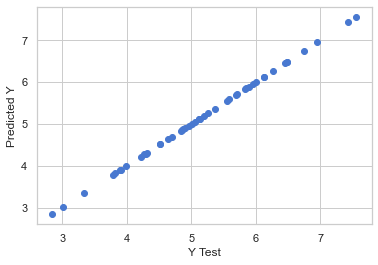

In [41]:
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.0002686191010089027
MSE: 9.548227095663887e-08
RMSE: 0.00030900205655729683


In [43]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Standard Error,-0.000663
Economy (GDP per Capita),1.000128
Family,0.999810
Health (Life Expectancy),0.999984
Freedom,0.999720
Trust (Government Corruption),0.999885
Generosity,0.999747
Dystopia Residual,0.999955


In [44]:
df1= df
df1.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [45]:
df=df1
cnt=df['Country']
rgn=df['Region']
rnk=df['Happiness Rank']
df1=df1.drop(['Country','Region','Happiness Rank'],axis=1)

AttributeError: module 'seaborn' has no attribute 'plt'

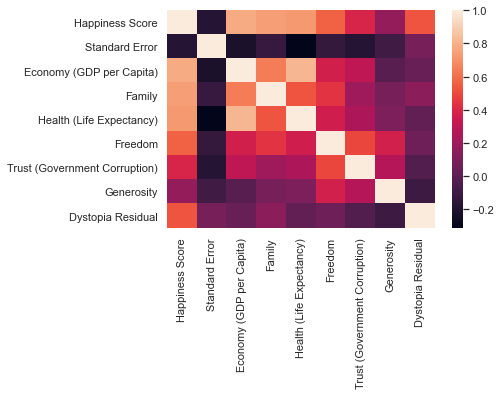

In [46]:
corr=df1.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

In [47]:
df1.head(2)

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [48]:
from sklearn.model_selection import train_test_split
label = df1.pop('Happiness Score')
data_train, data_test, label_train, label_test = train_test_split(df1, label, test_size = 0.2, random_state = 42)

In [49]:
data_train.count(),data_test.count()

(Standard Error                   126
 Economy (GDP per Capita)         126
 Family                           126
 Health (Life Expectancy)         126
 Freedom                          126
 Trust (Government Corruption)    126
 Generosity                       126
 Dystopia Residual                126
 dtype: int64,
 Standard Error                   32
 Economy (GDP per Capita)         32
 Family                           32
 Health (Life Expectancy)         32
 Freedom                          32
 Trust (Government Corruption)    32
 Generosity                       32
 Dystopia Residual                32
 dtype: int64)

In [51]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(data_train, label_train)
linear_score_train = linear.score(data_train, label_train)
print("Training score: ",linear_score_train)
linear_score_test = linear.score(data_test, label_test)
print("Testing score: ",linear_score_test)

Training score:  0.9999999391945544
Testing score:  0.9999999472734886


In [52]:
Predict=linear.predict(data_test)

In [54]:
result_lnr_reg=pd.DataFrame({
    'Actual':label_test,
    'Predict':Predict
})
result_lnr_reg.head(4)

,Actual,Predict
128,4.307,4.306895
45,5.987,5.987110
134,4.194,4.194273
156,2.905,2.904498


In [55]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor()
dt.fit(data_train, label_train)
dt_score_train = dt.score(data_train, label_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(data_test, label_test)
print("Testing score: ",dt_score_test)

Training score:  0.9869293704737505
Testing score:  0.9359630564712142


In [58]:
Predict_rf=dt.predict(data_test)
result_rf=pd.DataFrame({
    'Actual':label_test,
    'Predict':Predict_rf,
    'diff':label_test-Predict_rf
})

In [59]:
Predict_rf_train=dt.predict(data_train)
result_rf_train=pd.DataFrame({
    'Actual':label_train,
    'Predict':Predict_rf_train,
    'diff':label_train-Predict_rf_train
})

In [60]:
result_rf.head(4)

,Actual,Predict,diff
128,4.307,3.84611,0.46089
45,5.987,6.36915,-0.38215
134,4.194,4.51660,-0.32260
156,2.905,3.74823,-0.84323
